In [17]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,f1_score,precision_score,recall_score,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [18]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# Training data prepration

In [19]:
c1_x = mnist.train.images[mnist.train.labels==9]
c1_y = mnist.train.labels[mnist.train.labels==9]
c1_y = c1_y[:,None]
other_x = mnist.train.images[mnist.train.labels!=9]
other_y = mnist.train.labels[mnist.train.labels!=9]
other_y=other_y[:,None]

np.random.seed(42)
c1 = np.concatenate((c1_x,c1_y),axis=1)
others = np.concatenate((other_x,other_y), axis=1)
print(c1.shape)
print(others.shape)
print(others)
np.random.shuffle(others)
others = np.array(others)
print(others.shape)
others321 = others[0:321,:]
print(others321.shape)
train = np.concatenate((c1,others321),axis=0)
np.random.shuffle(train)
X_train = train[:,0:-1]
Y_train = train[:,-1]
Y_train[Y_train==0]=1
Y_train[Y_train==9]=0
Y_train[Y_train!=0]=1

sum(Y_train)

# Validation data prepration

np.random.seed(42)
valX_ones = mnist.validation.images[mnist.validation.labels==9]
valY_ones = mnist.validation.labels[mnist.validation.labels==9]
valX_others = mnist.validation.images[mnist.validation.labels!=9]
valY_others = mnist.validation.labels[mnist.validation.labels!=9]
valY_ones = valY_ones[:,None]
valY_others = valY_others[:,None]
val_ones = np.concatenate((valX_ones,valY_ones),axis=1)
val_others = np.concatenate((valX_others,valY_others),axis=1)
np.random.shuffle(val_others)
val_others137 = val_others[0:137,:]
val = np.concatenate((val_ones,val_others137),axis=0)
np.random.shuffle(val)
valX = val[:,0:-1]
valY = val[:,-1]
valY[valY==0]=1
valY[valY==9]=0
valY[valY!=0]=1

sum(valY)

# Test data prepration

np.random.seed(42)
testX_ones = mnist.test.images[mnist.test.labels==9]
testY_ones = mnist.test.labels[mnist.test.labels==9]
testX_others = mnist.test.images[mnist.test.labels!=9]
testY_others = mnist.test.labels[mnist.test.labels!=9]
testY_ones = testY_ones[:,None]
testY_others = testY_others[:,None]
test_ones = np.concatenate((testX_ones,testY_ones),axis=1)
test_others = np.concatenate((testX_others,testY_others),axis=1)
np.random.shuffle(test_others)
test_others137 = test_others[0:137,:]
test = np.concatenate((test_ones,test_others137),axis=0)
np.random.shuffle(test)
testX = test[:,0:-1]
testY = test[:,-1]
testY[testY==0]=1
testY[testY==9]=0
testY[testY!=0]=1

(5454, 785)
(49546, 785)
[[0. 0. 0. ... 0. 0. 7.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 4.]
 ...
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 6.]
 [0. 0. 0. ... 0. 0. 8.]]
(49546, 785)
(321, 785)


# Cross validation

In [1]:
"""f1 = []
for m in range(0,500):
    for n in range(0,1500):
        clf = IsolationForest(n_estimators=n,max_features=m,contamination=0.10,random_state=21)
        clf.fit(X_train)
        scores_pred = clf.decision_function(X_train)
        y_pred=clf.predict(valX)
        y_pred[y_pred==1]=0
        y_pred[y_pred==-1]=1
        f = f1_score(valY,y_pred)
        f1.append(f)
print("Best f-1 Score 10/90 for Isolation Forest is : ",max(f1) )
print("Best f-1 Score 10/90 for Isolation Forest parameters grid no. : ", f1.index(max(f1))+1) """

'f1 = []\nfor m in range(0,500):\n    for n in range(0,1500):\n        clf = IsolationForest(n_estimators=n,max_features=m,contamination=0.10,random_state=21)\n        clf.fit(X_train)\n        scores_pred = clf.decision_function(X_train)\n        y_pred=clf.predict(valX)\n        y_pred[y_pred==1]=0\n        y_pred[y_pred==-1]=1\n        f = f1_score(valY,y_pred)\n        f1.append(f)\nprint("Best f-1 Score 10/90 for Isolation Forest is : ",max(f1) )\nprint("Best f-1 Score 10/90 for Isolation Forest parameters grid no. : ", f1.index(max(f1))+1) '

# Testing

In [20]:
clf = IsolationForest(n_estimators=269,max_features=10,contamination=0.05,random_state=21)
clf.fit(X_train)
y_pred1 = clf.predict(valX)
y_pred2 = clf.predict(testX)
y_pred1[y_pred1==1]=0
y_pred1[y_pred1==-1]=1
y_pred2[y_pred2==1]=0
y_pred2[y_pred2==-1]=1
print ("Score on train set is: ", accuracy_score(valY,y_pred1))
print ("Score for test data is", accuracy_score(testY,y_pred2))
print("Classification report for train set")
print(classification_report(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(valY,y_pred1))
print("Confusion matrix for train set")
print(confusion_matrix(testY,y_pred2))
print("Classification report for test set")
print(classification_report(testY,y_pred2))

Score on train set is:  0.8417721518987342
Score for test data is 0.8944153577661431
Classification report for train set
             precision    recall  f1-score   support

        0.0       0.85      0.97      0.91       495
        1.0       0.78      0.38      0.51       137

avg / total       0.83      0.84      0.82       632

Confusion matrix for train set
[[480  15]
 [ 85  52]]
Confusion matrix for train set
[[972  37]
 [ 84  53]]
Classification report for test set
             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94      1009
        1.0       0.59      0.39      0.47       137

avg / total       0.88      0.89      0.88      1146



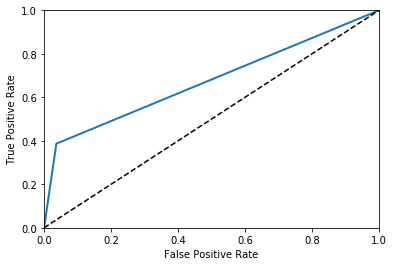

ROC AUC score is:  0.6750956718005108


In [21]:
# ROC AUC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(testY,y_pred2)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()


print("ROC AUC score is: ",roc_auc_score(testY,y_pred2))

